In [48]:
import os
import sys
import urllib.request
import json
import re
from collections import Counter

from matplotlib import font_manager, rc
from wordcloud import WordCloud
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import Text
import pandas as pd
from pandas import DataFrame

import time
from selenium import webdriver
from selenium.webdriver import Keys
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import os
import sys
import urllib.request
import json
import re
from collections import Counter
from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

okt = Okt()
client_id = "A2r40kSJtGPBGRuv6rzm"
client_secret = "13ltet_YUN"

In [ ]:
client_id = "A2r40kSJtGPBGRuv6rzm"
client_secret = "13ltet_YUN"

encText = urllib.parse.quote('')
url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100"+"&start="+str(num)+"&sort=sim" # json 결과
body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    response_body = json.loads(response_body)
    result_data = response_body['items']
    de_list = []
    de_list_link = []
    for index, item in enumerate(response_body['items']):
        tmp_data = re.sub(r'[0-9|<|>|b|\/]+', '', item['description'])
        tmp_data_link = item['link']
        de_list.append(tmp_data)
        de_list_link.append(tmp_data_link)
else:
    print("Error Code:" + rescode)

In [17]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request

#client_id = "YOUR_CLIENT_ID"
#client_secret = "YOUR_CLIENT_SECRET"
def get_cafe_list(query, start):
    client_id = "A2r40kSJtGPBGRuv6rzm"
    client_secret = "13ltet_YUN"
    encText = urllib.parse.quote(query)
    url = "https://openapi.naver.com/v1/search/cafearticle?query=" + encText + "&display=100"+ "&start=" + str(start) +"&sort=sim"# json 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_body = json.loads(response_body)
        result_data = response_body['items']
        de_list = []
        de_list_link = []
        for index, item in enumerate(response_body['items']):
            tmp_data = re.sub(r'[0-9|<|>|b|\/]+', '', item['description'])
            tmp_data_link = item['link']
            de_list.append(tmp_data)
            de_list_link.append(tmp_data_link)
    else:
        print("Error Code:" + rescode)
    return de_list

In [25]:
len(get_cafe_list('코로나', 1))

100

In [21]:
total_list = []
for i in range(1, 1001, 101):
    print(i)
    total_list.append(get_cafe_list('아이디어+회의+어려움', i))

1
102
203
304
405
506
607
708
809
910


In [27]:
len(total_list[0])

100

In [28]:
text_list = sum(total_list, [])

In [31]:
text_list[0]

'작성하는데 어려움은 없습니다. 시간이 걸리는 부분이라고 한다면 개인적으로 입학, 졸업, 휴학, 자격증 취득... PPT를 만든다던가, 아이디어 회의를 한다던가, 디자인을 그린다던가 할 때 구글링 등을 통해 많은 자료를... '

In [32]:
len(text_list)

1000

In [33]:
from nltk.corpus import stopwords

In [34]:
# 리스트를 문자열로 변환
text = ' '.join(text_list)



In [38]:
# 텍스트 형태소 분석
nouns = okt.nouns(text)


In [39]:
stopword = []

nouns

['작성',
 '어려움',
 '시간',
 '부분',
 '개인',
 '입학',
 '졸업',
 '휴학',
 '자격증',
 '취득',
 '를',
 '아이디어',
 '회의',
 '디자인',
 '때',
 '구글링',
 '등',
 '통해',
 '자료',
 '계속',
 '아이디어',
 '병원',
 '성장',
 '직원',
 '식',
 '동기부여',
 '고민',
 '아침',
 '회의',
 '때',
 '치과',
 '동향',
 '변경',
 '보험',
 '청구',
 '사항',
 '알',
 '아두',
 '현재',
 '앱',
 '거의',
 '완성',
 '단계',
 '마무리',
 '작업중',
 '현재',
 '외부',
 '사정',
 '운영',
 '어려움',
 '마케팅',
 '아이디어',
 '회의',
 '등',
 '통해',
 '활성화',
 '방안',
 '계속',
 '도출',
 '업무',
 '분',
 '구합',
 '니',
 '사무실',
 '역삼동',
 '소재',
 '루카',
 '신발',
 '가격',
 '크게',
 '자신',
 '스텝',
 '기술',
 '어려움',
 '구사',
 '수',
 '지령',
 '바람',
 '나이키',
 '개발',
 '팀',
 '밤새',
 '아이디어',
 '회의',
 '단가',
 '공장',
 '막',
 '글자',
 '수가',
 '본인',
 '어필',
 '어려움',
 '취준생',
 '입장',
 '글자',
 '수가',
 '뭘',
 '사람',
 '생각',
 '거',
 '취준생',
 '생각',
 '아이디어',
 '기업',
 '회의',
 '때',
 '용이',
 '거나',
 '라사',
 '패션',
 '디자인',
 '학생',
 '아이디어',
 '회의',
 '번의',
 '작업',
 '시안',
 '본인',
 '작품',
 '명',
 '내외',
 '수정',
 '그룹',
 '반',
 '운영',
 '집중',
 '상승',
 '뿐',
 '패션',
 '디자인',
 '학생',
 '어려움',
 '나',
 '아이디어',
 '위',
 '회의',
 '시간',
 '분배',
 '어려움',
 '코로나',
 '로'

In [59]:
count = Counter(nouns)
len(count)
words = (dict(count.most_common()))


In [60]:
len(words)

4301

In [61]:
df = pd.DataFrame(words.items(), columns=['단어', '빈도수'])

In [62]:
df

,단어,빈도수
0,아이디어,975
1,어려움,931
2,회의,676
3,것,318
4,수,224
...,...,...
4296,접근성,1
4297,흥부,1
4298,나머지,1
4299,판넬,1


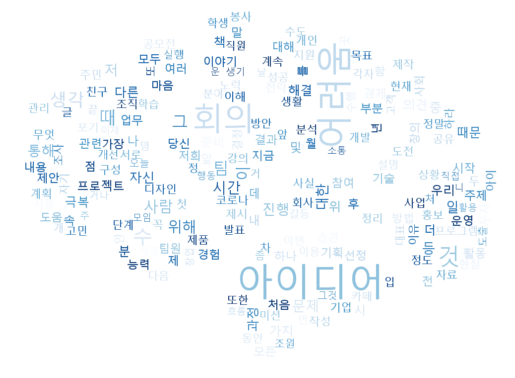

In [52]:
font_location = "C:\\Windows\\Fonts\\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

mask = Image.open('C:\\Users\\HP\\Desktop\\workPlace\\AI\\craw\\data\\img\\18098566.jpg')
mask = np.array(mask)

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, colormap='Blues_r',mask=mask).generate_from_frequencies(words)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [56]:
df.to_csv('C:\\Users\\HP\\Desktop\\workPlace\\AI\\craw\\data\\data.csv', encoding='utf-8-sig')

In [ ]:
client_id = "A2r40kSJtGPBGRuv6rzm"
client_secret = "13ltet_YUN"
encText = urllib.parse.quote("아이디어 회의")
#url = "https://openapi.naver.com/v1/search/blog?query=" + encText + "&sort=sim" # JSON 결과
url = "https://openapi.naver.com/v1/search/cafearticle.json?query=" + encText +"&display=100"+ "&sort=sim" # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    response_body = json.loads(response_body)
    result_data = response_body['items']
    result_list = []

    for index, item in enumerate(response_body['items']):
        tmp_data = re.sub(r'[0-9|<|>|b|\/]+', '', item['description'])
        result_list.append(tmp_data)
    #print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

In [10]:
result_list

['☎영상 아이디어 회의 인원 모집☎ 최대 모집인원: 명(마감) 지원자격(선택조건) 래더 플래티넘 이상 마스터 미만 회 이상 경험자 or LV 이상 + 번 엠블럼 소유자 지원자격(필수조건) 고등학생 이상 카카오톡 답장... ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 일찍 자려다가 현직 디자이너인 사촌동생에게 로고 맡기면서 아이디어 회의중인데 ㅋㅋㅋㅋㅋㅋㅋㅋ 은근 중독성있네여 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이제 자야디 ㅋㅋㅋㅋ 다들 굿밤',
 '이제 DIY 스태프들은 주민들을 위한 공방꾸미기를 위해 아이디어 회의를 개최하고자 합니다. 궁금하신 분은 참석하셔서 좋은 의견부탁드립니다. . 회의 일자: 월 일 일요일 아침 : . 장소 DIY 공방 교육장 .... ',
 '연휴동안 아이디어 생각해보고 오라하구.. 아침부터 회의하고 이 스트레스 주식으로 풀고 싶네요 **',
 '제주항공 전속모델 동방신기(유노윤호,최강창민)가 명예 제주항공직원이 되서 아이디어 회의에 참석했네요^^ 나중에 제주항공 합격하시면 비행전 브리핑 할때 사무장님과 진행하는 아이디어 회의도 흡사하지 않을까... ',
 '경영기획팀에서 아이디어 회의를 주최하고자 하는데요 잘 이루어지고 있으신가요 다들?? 한달에 한번 아이디어 회의를 하긴 하는데.. 아직은 초기단계라.. 잘 모르겠어서요 제안서 제출하는 대로 ,원씩 지불하는... ',
 '분따에 게시글 올린 이유는 한번씩 사무실 오셔서 미팅하며 아이디어 회의가 가능하신분을 찾고 있어서... 아무래도 온라인에 계신 프리랜서 디자이너 분들은 대부분 지역이 다르셔서 미팅이 안 되시더라고요. 그래서... ',
 '포켓헬멧에 대한 보완과 상품성향상, 판매방식, 런칭방법, 공략할 포인트를 찾는 함께 하는 즐거운 아이디어 회의였습니다. ^^ 다음모임은 월초에 다시 벨로스타 전기자전거로 조기서 모이기로 했습니다.(야외말고... ',
 "그런 이유로 공지형식의 회의나 의사결정을 위한 임원들 간의 회의가 아니라 서로 활발하게 이야기하고 재미를 느낄 수 있는 직원들 끼리의 '아이디어 회의'를